In [360]:
import pandas as pd
import matplotlib.pyplot as plt
#imports modules
df = pd.read_csv('./data/possessions-of-homes-in-london-boroughs.csv')
#reads in csv file
ts = df.melt(id_vars=['Area', 'Location'], var_name = 'year', value_name = 'possessions')
#melts the columns of the years into rows

ts['year'] = ts['year'].astype('str') + '/12/31'
ts['year'] = pd.to_datetime(ts['year'], format = '%Y/%m/%d')
#formats the years set to the end of the year, as the data includes
#4 complete quartiles
ts.set_index('year', inplace=True)

ts = ts.to_period('D')

ts.set_index(['Location', 'Area'], inplace=True, append=True)
ts.sort_index(inplace=True)
ts
#Creates hierarchal index to year and location of borough

possessions
year       Location Area                               
2003-12-31 Inner    Camden                          281
                    Greenwich                       433
                    Hackney                         565
                    Hammersmith and Fulham          189
                    Islington                       448
...                                                 ...
2014-12-31 Outer    Newham                         1011
                    Redbridge                       640
                    Richmond upon Thames             75
                    Sutton                          179
                    Waltham Forest                 1071

[384 rows x 1 columns]

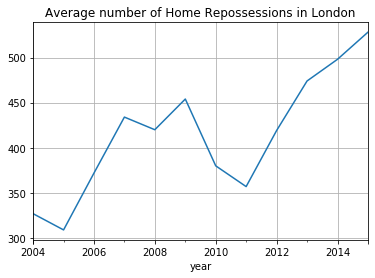

In [361]:
a11 = ts['possessions'].groupby(level=['year']).mean().round().plot(grid=True)
#collects average number of home repossessions by year of all boroughs
a11.set_title('Average number of Home Repossessions in London')
fig11 = a11.get_figure()
fig11.savefig('averageLondon.png')
plt.show()
#plots line graph

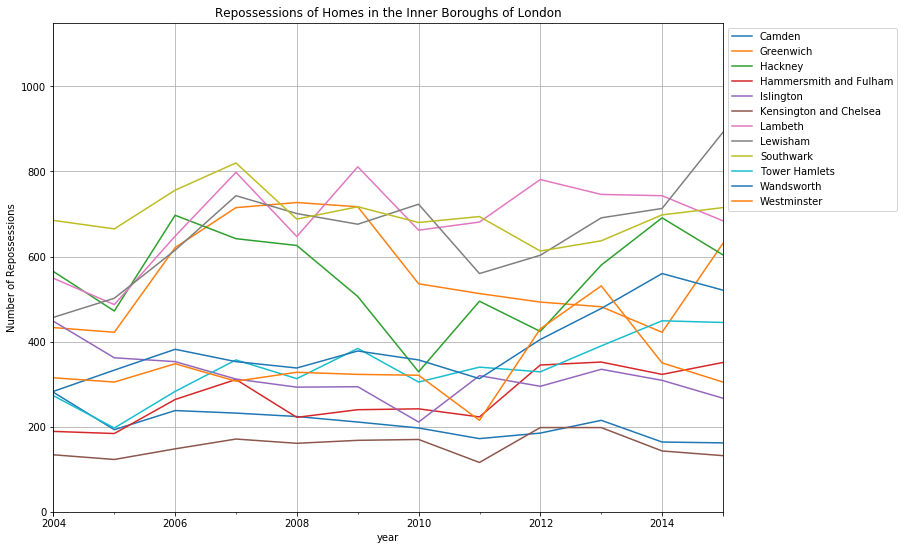

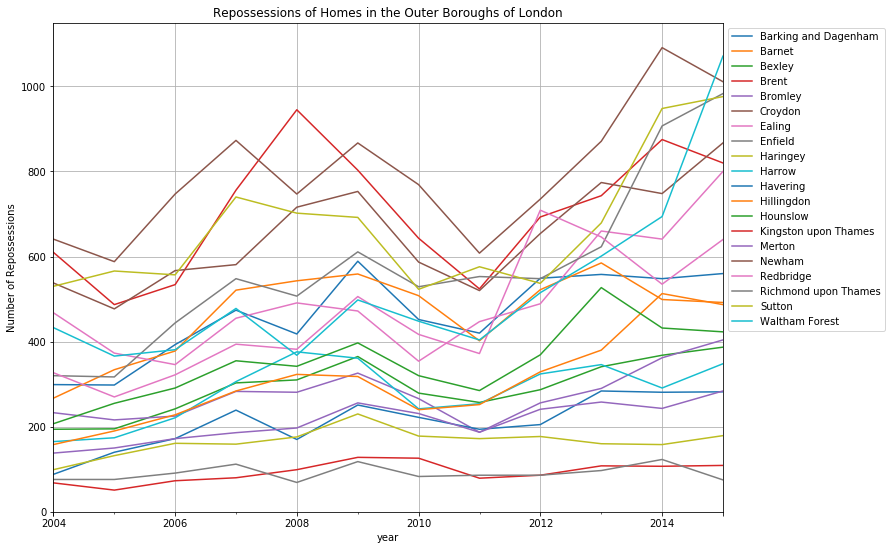

In [362]:
inner = ts.xs('Inner', level='Location').unstack()
#unstack removes location from index, splits repossessions into inner and outer columns
#Here I am setting 'inner' to contain the number of repossessions of the inner
#boroughs per year
fig, ax = plt.subplots(figsize=(12,9))
a1 = inner['possessions'].plot(grid=True, ax=ax)
a1.legend(bbox_to_anchor=(1.0, 1.0))
a1.set_ylim(0, 1150)
a1.set_title('Repossessions of Homes in the Inner Boroughs of London')
a1.set_ylabel('Number of Repossessions')
#plots line graph of 'inner'
fig1 = a1.get_figure()
fig1.savefig('innerBoroughs.png')
#Saves as .png file
outer = ts.xs('Outer', level='Location').unstack()
#Here I am doing the same thing I did above, only now looking at the
#outer boroughs
fig, ax = plt.subplots(figsize=(12,9))
a2 = outer['possessions'].plot(grid=True, ax=ax)
a2.set_ylim(0, 1150)
a2.legend(bbox_to_anchor=(1.0, 1.0))
a2.set_title('Repossessions of Homes in the Outer Boroughs of London')
a2.set_ylabel('Number of Repossessions')

fig2 = a2.get_figure()
fig2.savefig('outerBoroughs.png')

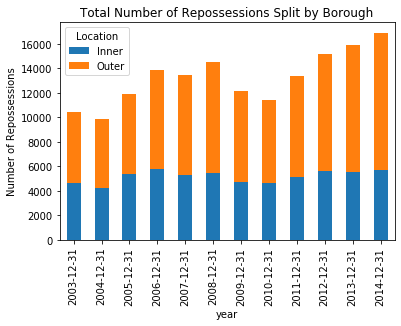

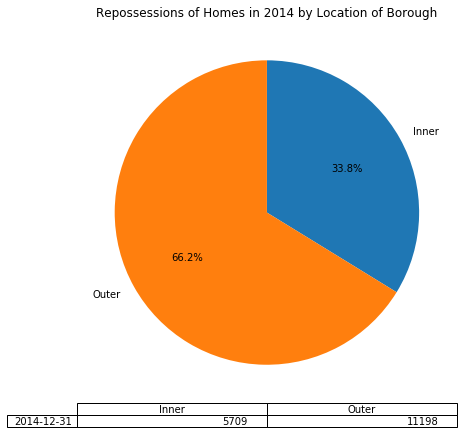

In [363]:
ax = ts['possessions'].groupby(level=['year', 'Location']).sum()
#Gets sum of the inner and outer boroughs repossesssions numbers
table = ax.unstack()
#Unstacks location from index, makes it into column
#Creates table
a3 = table.plot.bar(stacked=True)
a3.set_title('Total Number of Repossessions Split by Borough')
a3.set_ylabel('Number of Repossessions')
fig3 = a3.get_figure()
fig3.savefig('boroughsTotal.png')
#plots a stacked bar chart with data being shown between the inner and outer boroughs
plt.show()

a4 = table.loc['2014-12-31'].plot.pie(startangle=90,
    counterclock=False,
    figsize=(7,7),
    table=True,
    autopct='%1.1f%%')
#Creates pie chart of repossessions of from 2014, year with highest number
#split by inner and outer boroughs

a4.get_yaxis().set_visible(False)

a4.set_title('Repossessions of Homes in 2014 by Location of Borough')

fig4 = a4.get_figure()
fig4.savefig('2014boroughsPie.png')

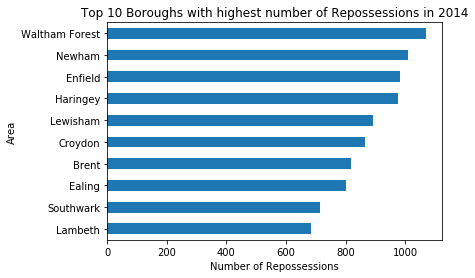

In [343]:
ts2 = df.melt(id_vars=['Area', 'Location'], var_name = 'year', value_name = 'possessions')


ts2['year'] = ts2['year'].astype('str') + '/12/31'
ts2['year'] = pd.to_datetime(ts2['year'], format = '%Y/%m/%d')

ts2.set_index('year', inplace=True)

ts2 = ts2.to_period('D')

ts2
#Created a new time series to work with, identical to the one set at the beginning

table = ts2.loc[('2014-12-31')]
#Created a table with data of the repossessions for each borough but only looking at
#2014

table

ordered2014 = table.sort_values(by=['possessions'], ascending=False)
#Ordered the table by boroughs with number of repossessions in descending order

bx = ordered2014.iloc[0:10]
#Selected 10 results

a5 = bx.plot.barh(x='Area', legend=False)
a5.invert_yaxis()
a5.set_xlabel('Number of Repossessions')
a5.set_title('Top 10 Boroughs with highest number of Repossessions in 2014')
plt.show()
#plots horizontal bar chart with 10 highest boroughs in terms of
#repossessions
fig5 = a5.get_figure()
fig5.savefig('Top102014.png')

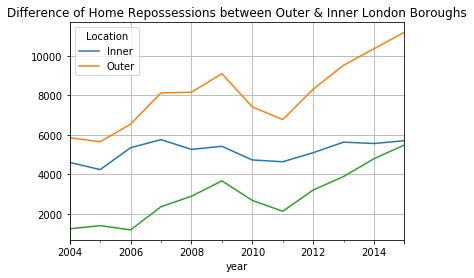

In [358]:
ba = ts['possessions'].groupby(level=['year', 'Location']).sum()

ba.head()
table = ba.unstack()
#creates table with repossessions with the location unstacked
a6 = table.plot(grid=True)
a6.set_title('End of Year Repossessions for Inner/Outer London')

difference = (ba.xs('Outer', level='Location') -
             ba.xs('Inner', level = 'Location'))
difference.name = 'difference'
#Finds difference between outer and inner boroughs per year

a7 = difference.plot(grid=True)
a7.set_title('Difference of Home Repossessions between Outer & Inner London Boroughs')
#plots difference between the boroughs on line graph
fig7 = a7.get_figure()
fig7.savefig('differenceLine.png')

In [293]:
difference.max()
max_year = difference.idxmax()
max_year
#Finds year with largest difference

Period('2014-12-31', 'D')

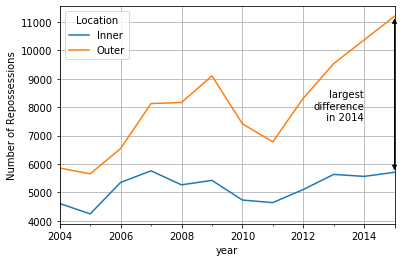

In [359]:
a8 = ba.unstack().plot(grid=True)
outer_max = ba.loc[max_year, 'Outer']
inner_max = ba.loc[max_year, 'Inner']


a8.text(max_year - 365,
       (outer_max - inner_max) / 3 + inner_max,
       'largest\ndifference\n in {}' .format(max_year.year),
       horizontalalignment='right')



a8.annotate('', xy=(max_year, outer_max),
               xytext=(max_year, inner_max),
               arrowprops=dict(
                   arrowstyle='<|-|>',
                   connectionstyle= 'arc3, rad=0.0',
                   edgecolor='black',
                   facecolor='black'))

#Finds the highest difference number for outer and inner boroughs
#then at that point in the graph creates a line showing the difference
#with accompanying text


a8.set_ylabel('Number of Repossessions')

fig8 = a8.get_figure()
fig8.savefig('differenceShown.png')

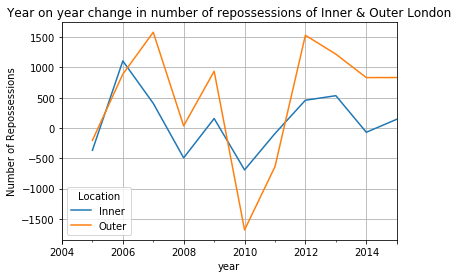

In [347]:
a9 = ba.unstack().diff().plot(grid=True)
a9.set_title('Year on year change in number of repossessions of Inner & Outer London')
a9.set_ylabel('Number of Repossessions')
#shows year in year change between the outer and inner boroughs themselves
#then plots line graph
fig9 = a9.get_figure()
fig9.savefig('change.png')